# Ch6 - Structures
A structure is a collection of 1 or more variables, possibly of different types, grouped together under a single name for convenience handling.
- help to organize complicated data - particularly in large programs, because they permit a group of related variables to be treated as a unit instead of as individual entities

structures may be copied and assigned to, passed to functions and returned by functions 

## 6.1 Basics of Structures
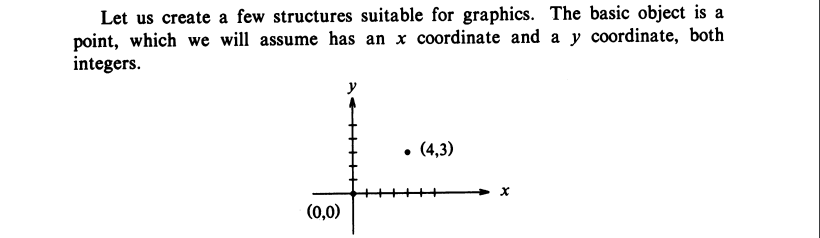

the 2 components can be placed in a structure declared as:

    struct point {
        int x;
        int y;
    };

- keyword `struct` introduces a structure declaration
- `point` - structure tag
- the variable names are called members
    - a structure member or tage & ordinary variable (non-member) can have the same name without conflict since they can always be distinquished by context
 
a strcuture declaration that is not followed by a list of variables reservers no storage; it juist describes the shape of a struct

## 6.2 Structures and Functions 
The only legal operations on a structure is copying it or assigning to it as a unit, taking its address with `&`, and accessing its members

There are atleast 3 possible approaches
1. pass components seperately
2. pass entire structure
3. pass a pointer to it
- each has it's good & bad points


        /* makepoint: make a point from x and y components */
        struct point makepoint(int x, int y)
        {
            struct point temp;
    
            temp.x = x;
            temp.y = y;
            return temp;
        }



`makepoint` can now be used to intialize any structure dynamically or to provide structure arguments to a function:

        struct rect screen;
        struct point middle;
        struct point makepoint(int, int);

        screen.pt1 = makepoint(0, 0);
        screen.pt2 = makepoint(XMAX, YMAX);
        middle = makepoint((screen.pt1.x + screen.pt2.x)/2,
                           (screen.pt1.y + screen.pt2.y)/2);

if a large structure is to be passed to a function it is generally more efficient to pass a pointer than to copy the whole structure
- structure pointers are just like pointers to ordinary variables

`struct point *pp;` - says that `pp` is a pointer to a structure of type `struct point`
- if `pp` points to a `point` structure, `*pp` is the structure, and `(*pp).x` & `(*pp).y` are the members

pointers to structures are so frequently used that an alternative notation is available:

`p->member-of-structure` - refers to the particular member

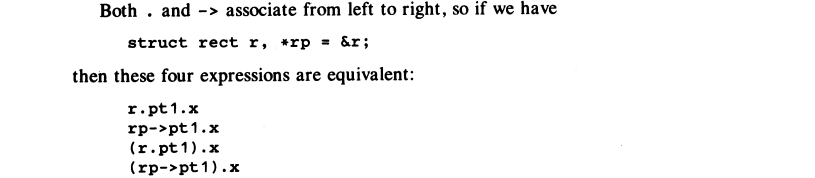

## 6.3 Arrays of Structures
C provides a compile-time unary operator called `sizeof` that can be used to compute the size of any object

`sizeof object` and `sizeof(type name)` yield an integer equal to the size of the specified object or type in bytes

## 6.4 Pointers to Structures
the addition of 2 pointers is illegal, subtraction is legal however

## 6.5 Self-referential Structures
here the description of a node (in a binary tree) is conveniently represented as a structure with 4 components:
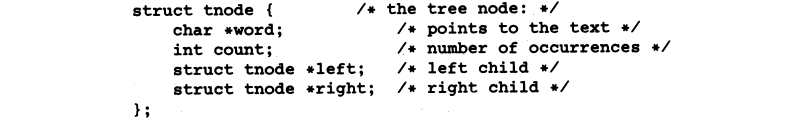

storage obtained by calling `malloc` may be freed for re-use by calling `free`

## 6.6 Table Lookup
In this section we will write the innards of a table lookup package to illustrate more aspects of structures

This code is typical of what might be found in the symbol table management routines of a macro processor or compiler

Eg; when a line like `#define IN 1` is encountered, the name `IN` and the replacement text `1` are stored in a table

Later when the name `IN` appears in a statement like; `state = IN;` it must be replaced by `1`

## 6.7 Typedef
C provides a facility called `typedef` for creating new data type names

Eg; `typedef int Length;`
- makes the name `Length` a synonym for `int`
- the type `Length` can be used in declarations, casts, etc, in exactly the same way `int` can be:


        Length len, maxlen;
        Length *lenghts[];

Similarly the declaration `typedef char *String;` makes `String` a synonym for `char *` or character pointer, when may then be used in declarations and casts

`typedef` declaration does not create a new type in any sense; it merely adds a new name for some existing type

besides aesthetics, there are 2 main reasons for using typedefs:
1. to parameterize a program against portability problems
    - eg; only the typedefs need to change when a program is moved wrt machine dependent data types
2. to provide better documentation for a program
    - a type called Treeptr may be easier to understand than one declared only as a pointer to a complicated structure

## 6.8 Unions
A **union** is a variable that may hold (at different times) objects of different types and sizes, with the compiler keeping track of size and alignment requirements

Unions provide a way to manipulate different kinds of data in a single area of storage, without embedding any machine-dependent info in the program

eg: suppose a constant may be an int, float, or character pointer
- the value of a particular constant must be stored in a variable of the proper type, yet is convenient for table management if the value occupies the same amount of storage and stored at the same place regardless of its type
- this is the purpose of a **union** - a single variable that can legitimately hold any 1 of several types

The syntax is based on Strutures:

    union u_tag {
        int ival;
        float fval;
        char *sval;
    } u;

The variable `u` will be large enough to hold any of the 3 types
- any of these types may be assigned to `u` & then used in expressions so long as the usage is consistent


## 6.9 Bit-fields
When storage space is at a premium it may be necessary to pack several objects into a single machine word

A bit-field, or field for short is a set of adjacent bits within a single implementation-defined storage unit that we will call a "word"

The syntax of field definition & access is based on structures